In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"D:\Earthquake-prediction-using-Machine-learning-models-main\Dataset\Earthquake_Data.csv", delimiter=r'\s+')

# read_csv argument to load date_time column ---> ''', parse_dates=['Date(YYYY/MM/DD)']'''

df.sample(10)

,Date(YYYY/MM/DD),Time,Latitude,Longitude,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,EventID
9490,1987/08/02,04:39:48.96,40.3067,-124.4357,21.55,3.40,ML,18,233,21,0.06,NCSN,103901
11649,1992/04/26,08:19:13.53,40.3237,-124.4780,19.68,3.08,Md,13,250,17,0.03,NCSN,268040
13601,1994/11/11,06:37:31.58,40.3848,-124.8793,22.61,3.37,Md,28,276,47,0.14,NCSN,30062419
3856,1976/10/10,10:26:32.07,36.6440,-121.2567,5.92,3.21,Md,31,49,6,0.04,NCSN,-1031857
11107,1991/03/25,15:46:14.26,37.6460,-118.9365,7.92,3.50,ML,30,56,2,0.08,NCSN,208716
10384,1989/10/18,00:40:57.75,37.1908,-121.9727,4.17,3.10,ML,40,66,2,0.16,NCSN,10090724
17785,2006/11/26,09:40:22.01,38.7587,-122.7152,1.87,3.00,Md,50,28,2,0.08,NCSN,21549419
7422,1983/09/09,23:22:25.57,37.5027,-118.7983,3.73,3.40,ML,19,118,10,0.04,NCSN,-1102344
7001,1983/05/03,09:39:45.53,36.2750,-120.2665,10.43,4.10,Md,70,210,7,0.22,NCSN,-1091576
16473,2002/02/24,06:21:48.90,35.9640,-117.6765,8.81,3.07,Md,7,219,3,0.03,NCSN,21213927


##Preprocessing
No preprocessing required because the data is already clean and structured.
We just have to change the column names to meaningful names.

In [4]:
new_column_names = ["Date(YYYY/MM/DD)",  "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude(ergs)", 
                    "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns = new_column_names
ts = pd.to_datetime(df["Date(YYYY/MM/DD)"] + " " + df["Time(UTC)"])
df = df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1)
df.index = ts
display(df)

,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS,SRC,EventID
1966-07-01 09:41:21.820,35.9463,-120.4700,12.26,3.20,Mx,7,171,20,0.02,NCSN,-4540462
1966-07-02 12:08:34.250,35.7867,-120.3265,8.99,3.70,Mx,8,86,3,0.04,NCSN,-4540520
1966-07-02 12:16:14.950,35.7928,-120.3353,9.88,3.40,Mx,8,89,2,0.03,NCSN,-4540521
1966-07-02 12:25:06.120,35.7970,-120.3282,9.09,3.10,Mx,8,101,3,0.08,NCSN,-4540522
1966-07-05 18:54:54.360,35.9223,-120.4585,7.86,3.10,Mx,9,161,14,0.04,NCSN,-4540594
...,...,...,...,...,...,...,...,...,...,...,...
2007-12-19 12:14:09.620,34.1438,-116.9822,7.03,4.06,ML,10,73,14,0.08,NCSN,40207706
2007-12-21 12:14:56.450,37.3078,-121.6735,8.47,3.08,ML,114,45,5,0.12,NCSN,51192926
2007-12-23 21:43:43.540,37.2127,-117.8230,10.00,3.54,ML,45,176,40,0.07,NCSN,51193070
2007-12-28 01:59:42.400,36.5292,-121.1133,5.99,3.04,ML,70,45,4,0.06,NCSN,51193343


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18030 entries, 1966-07-01 09:41:21.820000 to 2007-12-28 23:20:28.120000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude(deg)    18030 non-null  float64
 1   Longitude(deg)   18030 non-null  float64
 2   Depth(km)        18030 non-null  float64
 3   Magnitude(ergs)  18030 non-null  float64
 4   Magnitude_type   18030 non-null  object 
 5   No_of_Stations   18030 non-null  int64  
 6   Gap              18030 non-null  int64  
 7   Close            18030 non-null  int64  
 8   RMS              18030 non-null  float64
 9   SRC              18030 non-null  object 
 10  EventID          18030 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.7+ MB


##Export Preprocessed dataset
Export the data into xlsx file

In [6]:
file_name = 'Earthquake_data_processed.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [7]:
import warnings
warnings.filterwarnings('ignore')

##Partition the data into Training and Testing data

In [8]:
from sklearn.model_selection import train_test_split

# Select relevant columns
X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
y = df['Magnitude(ergs)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##Linear regression

<h3>Loading the model and fitting it with training data</h3>

In [9]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

<h3>Predict the testing data</h3>
Find the predicted values and evaluate it using metrics of linear regression

In [10]:
from sklearn.metrics import r2_score, mean_squared_error

scores= {"Model name": ["Linear regression", "SVM", "Random Forest"], "mse": [], "R^2": []}

# Predict on the testing set
y_pred = regressor.predict(X_test)

# Compute R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print("R^2: {:.2f}, MSE: {:.2f}".format(r2, mse))

R^2: 0.02, MSE: 0.19


<h3>Predict for new data</h3>



In [11]:
# Predict on new data
new_data = [[33.89, -118.40, 16.17, 11], [37.77, -122.42, 8.05, 14]]
new_pred = regressor.predict(new_data)
print("New predictions:", new_pred)

New predictions: [3.447483   3.33027751]


Using Support Vector Algorithm

In [76]:
from sklearn.svm import SVR

# Select a subset of the training data
subset_size = 500
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Create an SVM model
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train_subset, y_train_subset)

# Evaluate the model on the test set
score = svm.score(X_test, y_test)
print("Test score:", score)

Test score: -1.9212973747969442


<h3>Predict the testing data</h3>
Find the predicted values and evaluate it using metrics like MSE, r2

In [77]:
# Predict on the testing set
y_pred_svm = svm.predict(X_test)

# Compute R^2 and MSE
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

scores['mse'].append(mse_svm)
scores['R^2'].append(r2_svm)

print("SVM R^2: {:.2f}, MSE: {:.2f}".format(r2_svm, mse_svm))

SVM R^2: -1.92, MSE: 0.53


<h3>Predict for new data</h3>



In [37]:
# Predict on new data
new_pred_svm = svm.predict(new_data)
print("New SVM predictions:", new_pred_svm)

New SVM predictions: [3.57401976 3.03496212]


<h3>Plot model</h3>

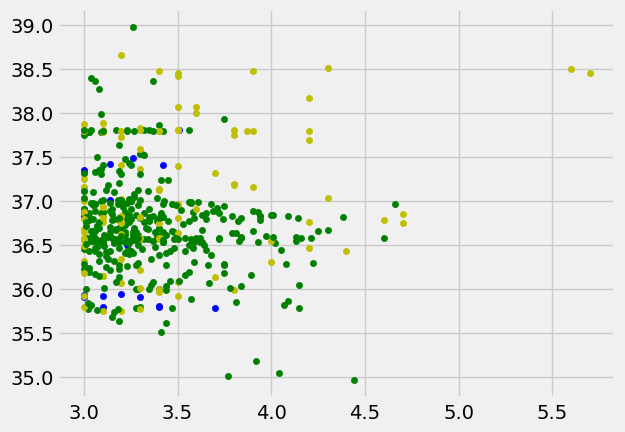

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.svm import SVC 
  
style.use('fivethirtyeight')
  
# create mesh grids
def make_meshgrid(x, y, h =.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
  
# plot the contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
# color = ['y', 'b', 'g', 'k']

subset_size = 500

# modify the column names based on the dataset
features = df[['Magnitude(ergs)','Latitude(deg)']][:subset_size].values
classes = df['Magnitude_type'][:subset_size].values
  
# create 3 svm with rbf kernels
svm1 = SVC(kernel ='rbf')
svm2 = SVC(kernel ='rbf')
svm3 = SVC(kernel ='rbf')
svm4 = SVC(kernel ='rbf') 

# fit each svm's
svm1.fit(features, (classes=='ML').astype(int))
svm2.fit(features, (classes=='Mx').astype(int))
svm3.fit(features, (classes=='Md').astype(int))
  
fig, ax = plt.subplots()
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)
  
# plot the contours
'''
plot_contours(ax, svm1, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.8)
plot_contours(ax, svm2, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.3)
plot_contours(ax, svm3, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.5)
'''
color = ['y', 'b', 'g', 'k', 'm']



for i in range(subset_size):
    if classes[i] == 'ML':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[0])
    elif classes[i] == 'Mx':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[1])
    elif classes[i] == 'Md':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[2])
    else:
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[4])
plt.show()

Naive Bayes



>**Note: Naive bayes is used for strings and numbers(categorically) it can be used for classification so it can be either 1 or 0 nothing in between like 0.5 (regression). Even if we force naive bayes and tweak it a little bit for regression the result is disappointing.




**`This code is just for predicting categorical data magnitude type with Naive Bayes`**

In [40]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV file with space delimiter
df = pd.read_csv('/content/Earthquake_Data.csv', delimiter=r'\s+')

new_column_names = ["Date(YYYY/MM/DD)",  "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude", 
                    "Magnitude_Category", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns = new_column_names

# Convert magnitude column to categorical data
df['Magnitude_Category'] = pd.cut(df['Magnitude'], bins=[0, 5, 6, 7, np.inf], labels=['Minor', 'Moderate', 'Strong', 'Major'])

# Encode Magnitude Category
le = LabelEncoder()
df['Magnitude_Category_Encoded'] = le.fit_transform(df['Magnitude_Category'])

# Normalize latitude and longitude values
scaler = MinMaxScaler()
df[['Latitude(deg)', 'Longitude(deg)']] = scaler.fit_transform(df[['Latitude(deg)', 'Longitude(deg)']])

# Select features
X = df[['Latitude(deg)', 'Longitude(deg)', 'No_of_Stations']]
y = df['Magnitude_Category_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gaussian Naive Bayes model on the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [44]:
# Use the trained model to make predictions on the testing data
y_pred = gnb.predict(X_test)


In [46]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate and print the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

cr = classification_report(y_test, y_pred, labels=[0, 1, 2, 3], target_names=['Minor', 'Moderate', 'Strong', 'Major'])
print('Classification Report:\n', cr)

Accuracy: 0.9853947125161767
Confusion Matrix:
 [[5327   35    1]
 [  38    3    1]
 [   4    0    0]]
Classification Report:
               precision    recall  f1-score   support

       Minor       0.00      0.00      0.00         0
    Moderate       0.99      0.99      0.99      5363
      Strong       0.08      0.07      0.07        42
       Major       0.00      0.00      0.00         4

   micro avg       0.99      0.99      0.99      5409
   macro avg       0.27      0.27      0.27      5409
weighted avg       0.98      0.99      0.98      5409



Testing Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<h3>Predict the testing data and evaluate it</h3>
Find the predicted values and evaluate it using metrics like MSE, r2

In [89]:
# Predict the target variable on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print('Mean Squared Error: ', mse)
print('R^2 Score: ', r2)

Mean Squared Error:  0.15599116006378258
R^2 Score:  0.1428805732295345


<h3>Plot model</h3>

**Scatter plot**

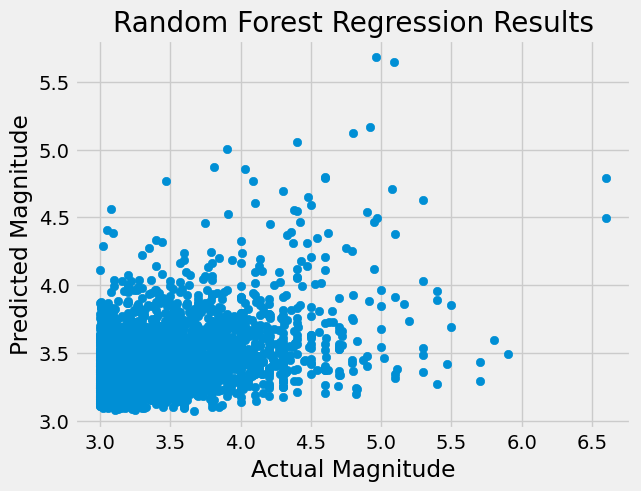

In [82]:
# Plot the predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')
plt.show()